In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd /content/drive/My\ Drive/Colab\ Notebooks/

/content/drive/My Drive/Colab Notebooks


In [3]:
cd Supporting\ Files/CODES/cifar-10-batches-py

/content/drive/My Drive/Colab Notebooks/Supporting Files/CODES/cifar-10-batches-py


In [4]:
import keras
from keras.utils import to_categorical
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.models import Model

import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

Using TensorFlow backend.


In [0]:
def visualize_images(data, labels, label_names, predict=None, channels=3,
                     start=0, cols=4, rows=4, size=10, fontsize=10):
    '''
    Pre : gives a numpy array represents data of color images (4 dimensions
    array), a numpy array represents labels for the corresponding images, a
    numpy array represents the label names, a numpy array represents the
    prediction for the given images, an integer represents number of channels
    of the given images with default = 3, an integer represents start index
    for visualization with default = 0, an integer represents number of
    columns with default = 4, an integer represents number of columns with
    default = 4, an integer represents size of image with default = 10, an
    integer represents size of title's font with default = 10.

    Post: plots predicted images and save the plot to 'CNN predictions.png'.
    '''
    if (channels != 3):
        data = data[:, :, :, 0]
    fig = plt.figure(figsize=(size, size))
    plt.subplots_adjust(bottom=.05, top=.95, hspace=.9)

    cols = cols
    rows = rows
    for i in range(1, cols * rows + 1):
        img = data[start + i - 1]
        fig.add_subplot(rows, cols, i)
        if (channels != 3):
            plt.imshow(img, cmap='gray')
        else:
            plt.imshow(img)

        if predict is not None:
            pred = label_names[predict[start + i - 1]]
        else:
            pred = 'NaN'
        real = label_names[int(np.where(labels[start + i - 1] == 1)[0])]
        plt.title('Predict: ' + pred + '\n Real: ' + real, fontsize=fontsize)
        plt.axis('off')
        plt.savefig('CNN predictions.png')
    plt.show()

In [0]:
def check_predictions_probability(model, x_test, y_test, label_names,
                                  number_instances=10):
    '''
    Pre : gives a Kereas Sequential model, a numpy array represents
    x_test with 4 dimensions (color images), a numpy array represents
    all labels for corresponding testing images, a numpy array of label
    names, and an integer represents number of testing instances with
    default = 10.

    Post: plots several predictions with probabilities of each label
    and save as png files.
    '''
    print('Use several examples to see how the model classify:')
    y_pred = model.predict(x_test)

    for i in range(number_instances):
        scores = y_pred[i]
        data = pd.DataFrame({'Labels': label_names, 'Scores': scores})
        sns.catplot(
                x='Labels',
                y='Scores',
                kind='bar',
                data=data
            )
        plt.xticks(rotation=-45)
        plt.title('Testing Instance ID: ' + str(i) + '\n'
                  'Predicted:' + str(label_names[np.argmax(scores)])
                  + '\nReal Label:'
                  + str(label_names[int(np.where(y_test[i] == 1)[0])]))
        plt.savefig('CNN prediction probability instance ' + str(i) + '.png',
                    bbox_inches='tight')


In [0]:
def de_mean(data):
  '''
  Pre : gives a np array represents color images.
  
  Post: returns a new np array represents color images after
  normalization by subtracting mean.
  '''
  return data - np.mean(data, axis=0)

In [0]:
def initialize_model():
  model = Sequential()

  model.add(Conv2D(
      filters=32, kernel_size=(3, 3), input_shape=x_train.shape[1:]
  ))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(filters=64, kernel_size=(3, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())

  model.add(Conv2D(filters=64, kernel_size=(3, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  
  model.add(Conv2D(filters=128, kernel_size=(3, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(filters=256, kernel_size=(3, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())

  model.add(Flatten())
  model.add(Dense(64))
  model.add(Activation('relu'))
  model.add(BatchNormalization(axis=1))
  model.add(Dropout(0.3))

  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  return model

In [0]:
# load data
x_train = np.load('Models/x_train.npy').astype('float32') / 255
x_val = np.load('Models/x_val.npy').astype('float32') / 255
x_test = np.load('Models/x_test.npy').astype('float32') / 255
y_train = np.load('Models/y_train.npy')
y_val = np.load('Models/y_val.npy')
y_test = np.load('Models/y_test.npy')
label_names = np.load('Models/label_names.npy')
num_classes = len(label_names)

# put y_train, y_val, and y_test to categories
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

In [0]:
x_train_demean = de_mean(x_train)
x_train_normalization = x_train_demean / np.std(x_train_demean, axis=0)

x_val_demean = de_mean(x_val)
x_val_normalization = x_val_demean / np.std(x_val_demean, axis=0)

x_test_demean = de_mean(x_test)
x_test_normalization = x_test_demean / np.std(x_test_demean, axis=0)

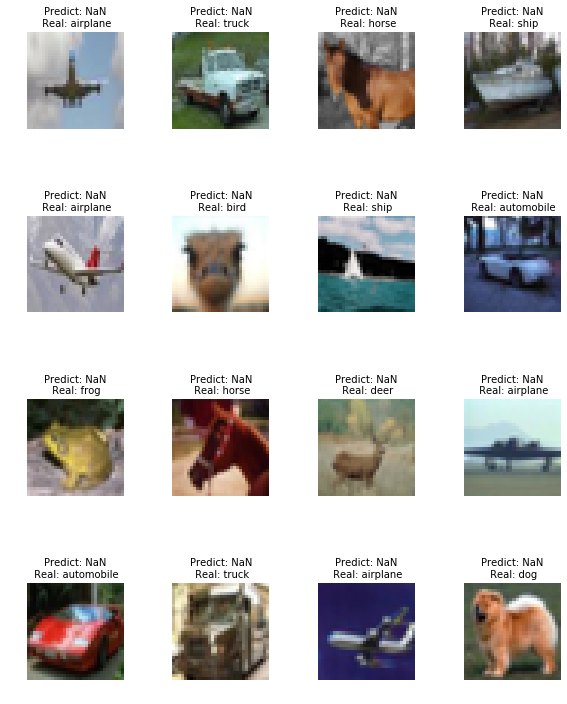

In [0]:
visualize_images(x_train, y_train, label_names)

W0625 02:02:03.341420 139944655607680 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0625 02:02:03.362036 139944655607680 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0625 02:02:03.374410 139944655607680 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0625 02:02:03.388227 139944655607680 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0625 02:02:03.401693 139944655607680 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0625 02:02:03.413307 139944655607680 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0625 02:02:03.429564 139944

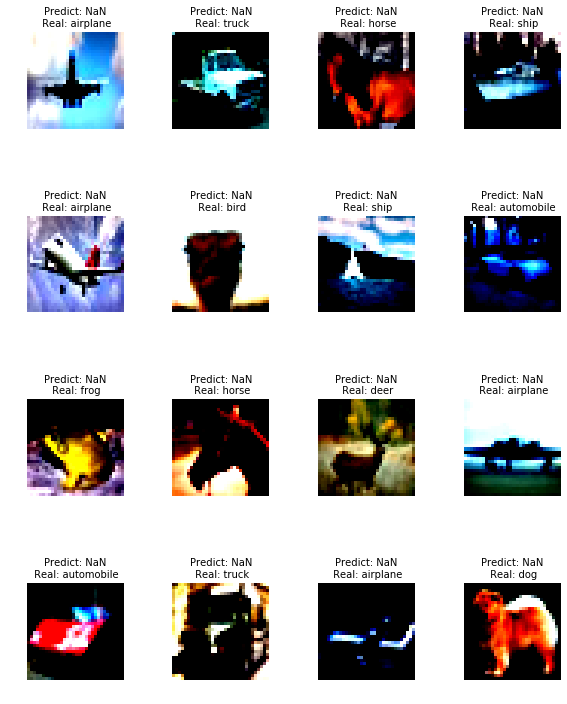

In [0]:
visualize_images(x_train_normalization, y_train, label_names)

In [0]:
# initialize model
model = initialize_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_14 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
__________

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen.fit(x_train_normalization)

In [0]:
# compile the model
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# setup Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10,
                               verbose=2, mode='auto', baseline=None,
                               restore_best_weights=True)

# setup model checkpoint
checkpointer = ModelCheckpoint(filepath='Models/weights.hdf5', verbose=1,
                               save_best_only=True)

# setup reduce learning rate when the metric stops improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3,
                              verbose=1, mode='auto', min_delta=0.0001,
                              cooldown=0, min_lr=0)

# fit the model with training data and validate with validation data
'''
history = model.fit(
    x_train_normalization, y_train,
    batch_size=32,
    epochs=50,
    validation_data=(x_val_normalization, y_val),
    shuffle=True,
    callbacks=[early_stopping, checkpointer, reduce_lr]
)
'''

history = model.fit_generator(
    datagen.flow(x_train_normalization, y_train, batch_size=32),
    steps_per_epoch=len(x_train_normalization) / 32, epochs=100,
    validation_data=(x_val_normalization, y_val),
    shuffle=True,
    callbacks=[early_stopping, checkpointer, reduce_lr]                             
)


Epoch 1/100
1407/1406 [==============================] - 36s 26ms/step - loss: 1.7352 - acc: 0.3812 - val_loss: 1.3627 - val_acc: 0.5142

Epoch 00001: val_loss improved from inf to 1.36271, saving model to Models/weights.hdf5
Epoch 2/100
1407/1406 [==============================] - 33s 24ms/step - loss: 1.2972 - acc: 0.5408 - val_loss: 1.0389 - val_acc: 0.6410

Epoch 00002: val_loss improved from 1.36271 to 1.03888, saving model to Models/weights.hdf5
Epoch 3/100
1407/1406 [==============================] - 33s 24ms/step - loss: 1.1356 - acc: 0.6034 - val_loss: 0.9167 - val_acc: 0.6800

Epoch 00003: val_loss improved from 1.03888 to 0.91672, saving model to Models/weights.hdf5
Epoch 4/100
1407/1406 [==============================] - 33s 24ms/step - loss: 1.0204 - acc: 0.6450 - val_loss: 0.8986 - val_acc: 0.6870

Epoch 00004: val_loss improved from 0.91672 to 0.89861, saving model to Models/weights.hdf5
Epoch 5/100
1407/1406 [==============================] - 33s 23ms/step - loss: 0.943

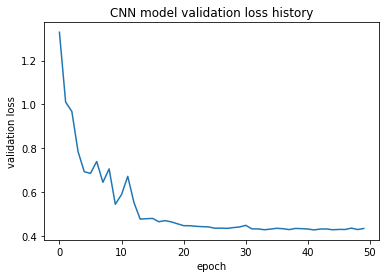

In [0]:
# plot the model's validation loss for further hyperparameters tuning
val_loss = history.history['val_loss']
plt.plot(np.arange(len(val_loss)), val_loss)
plt.xlabel('epoch')
plt.ylabel('validation loss')
plt.title('CNN model validation loss history')
plt.show()

In [17]:
# predict testing data
print()
print('Evaluating testing data:')
scores = model.evaluate(
    x_test_normalization,
    y_test,
    verbose=1
)
print('   Model accuracy for testing data:', str(scores[1] * 100) + '%')
print()


Evaluating testing data:
10000/10000 [==============================] - 3s 272us/step
   Model accuracy for testing data: 85.25%



In [0]:
y_pred = model.predict_classes(x_test_normalization)

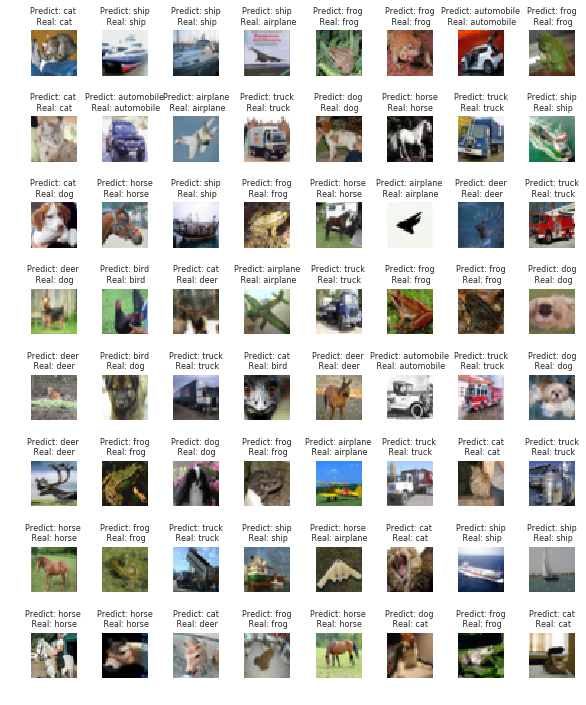

In [19]:
visualize_images(x_test, y_test, label_names, y_pred, cols=8, rows=8, fontsize=8)

In [0]:
def save_model(model, name, direction):
    '''
    Pre : gives a Kereas Sequential model, a file name as string, and
    a direction from current directory as string

    Post: saves the model to the given path
    '''
    save_dir = os.path.join(os.getcwd(), direction)
    model_path = os.path.join(save_dir, name)
    model.save(model_path)

# export model
save_model(model, name='cnn_model_improved', direction='Models')

In [0]:
def visualize_filters(model, layer_index, channel=0, figsize=(5, 5)):
    '''
    Pre : gives a Keras sequential model, an integer represents the index
    of layer, an integer represent index of channel with default = 0, a
    tuple represents figure size with default = (5, 5).

    Post: plots predicted filters at the given channel and save the plots
    as png files.
    '''
    filters = model.layers[layer_index].get_weights()[0][:, :, :, :][:, :, :]
    rows = 4 * (filters.shape[3] // 32)
    cols = filters.shape[3] // rows

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    plt.subplots_adjust(bottom=.05, top=.95, hspace=.9)
    index = 0

    for i in range(rows):
        for j in range(cols):
            # filters[row, col, channel,filters index]
            axes[i, j].imshow(filters[:, :, channel, index], cmap='gray')
            index += 1
            axes[i, j].axis('off')
    title = 'Filters visualization - Layer: ' + str(layer_index)\
            + ' - channel: ' + str(channel)
    fig.suptitle(title)
    plt.show()


def visualize_activations(model, data, image_index, layer):
    '''
    Pre : gives a Keras Sequential model, a numpy array (4D) represents images,
    an integer represents the image's index needed to visualize, an integer
    represents the layer that need to visualize.

    Post: plots predicted activations at the given channel and save the plots
    as png files.
    '''
    activations = Model(inputs=model.input, outputs=model.layers[layer].output)

    number_filters = int(model.layers[layer].output.shape[3])
    rows = 4 * (number_filters // 32)
    cols = number_filters // rows
    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

    index = 0
    for i in range(rows):
        for j in range(cols):
            image = activations.predict(
                data[image_index:image_index+1])[0, :, :, index]
            axes[i][j].imshow(image, cmap='gray')
            axes[i][j].axis('off')
            index += 1
    title = 'Activation visualization Layer ' + str(layer)
    fig.suptitle(title)
    plt.show()

Use several examples to see how the model classify:


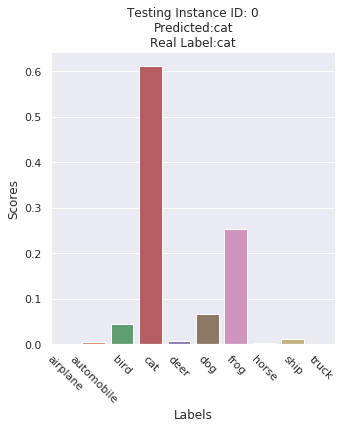

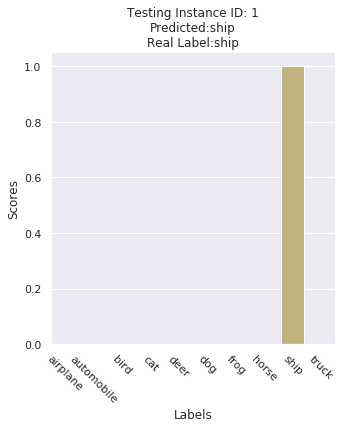

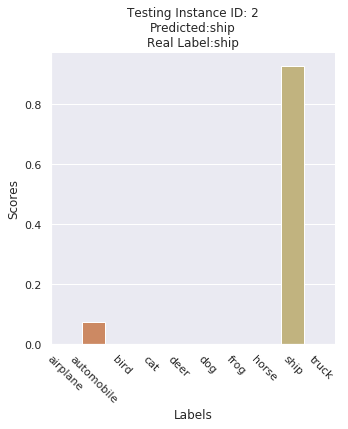

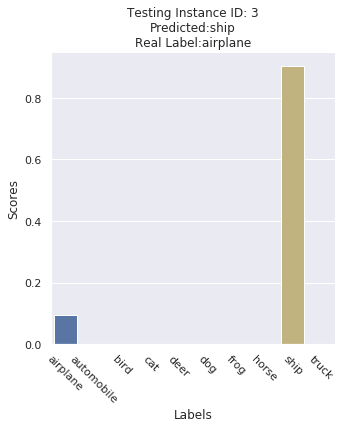

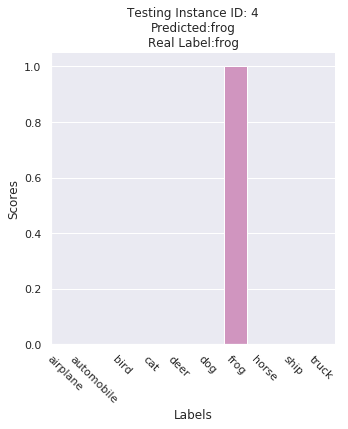

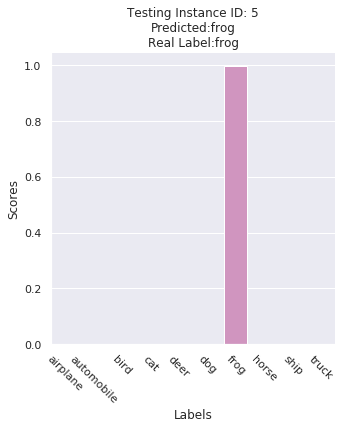

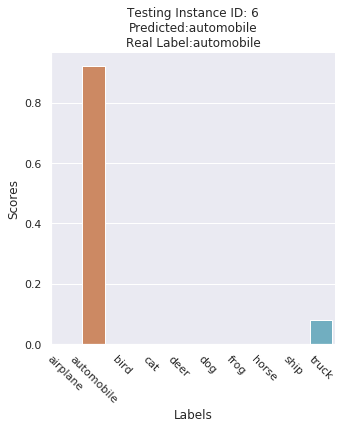

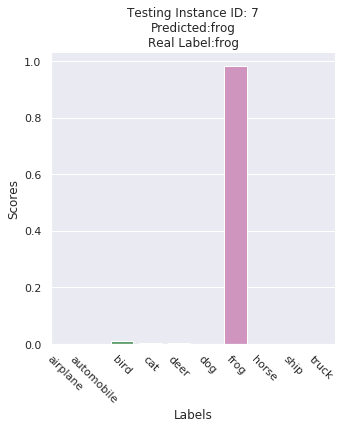

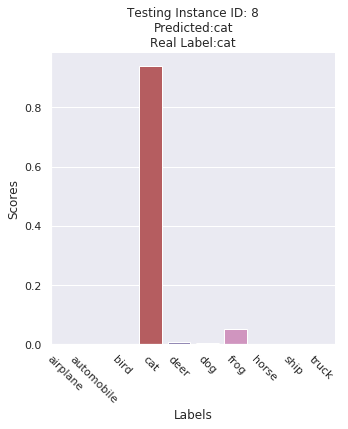

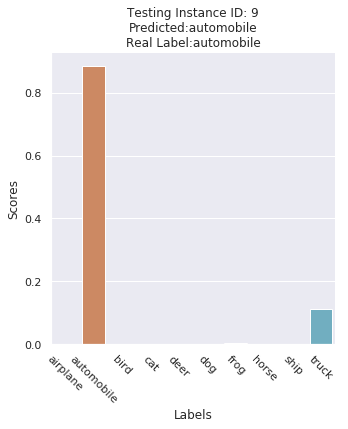

In [21]:
model = keras.models.load_model('Models/cnn_model_improved')


# check predictions probability
sns.set()
check_predictions_probability(model, x_test_normalization, y_test, label_names)

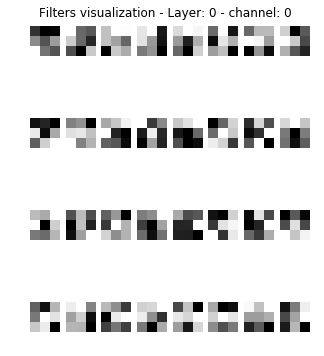

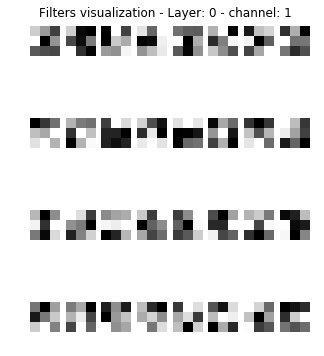

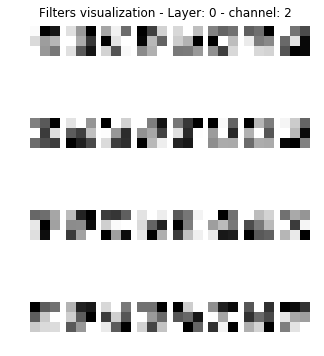

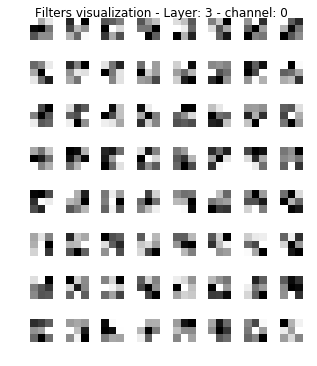

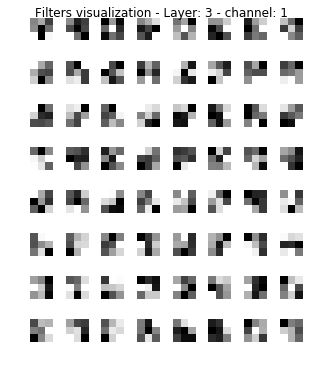

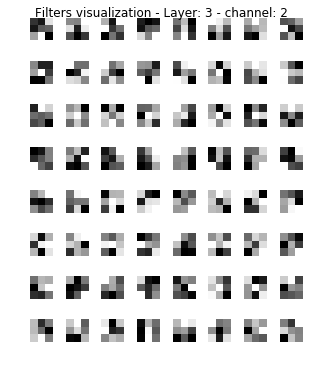

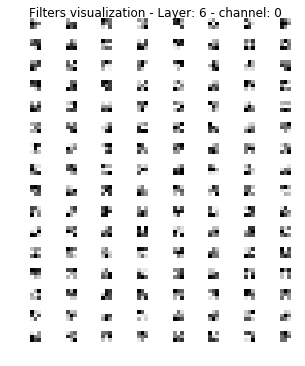

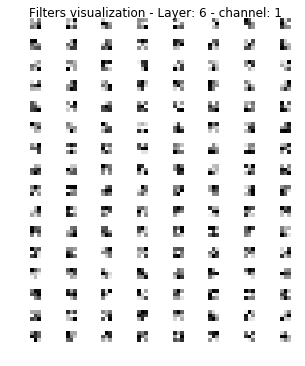

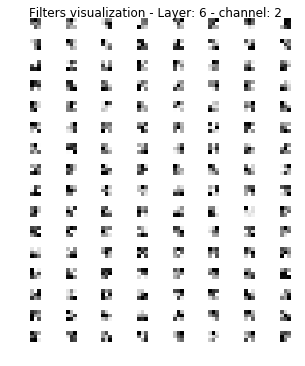

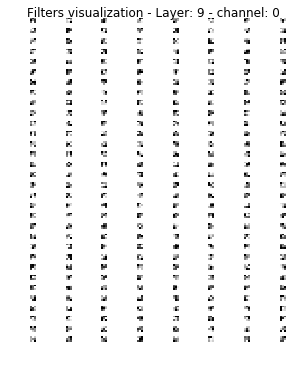

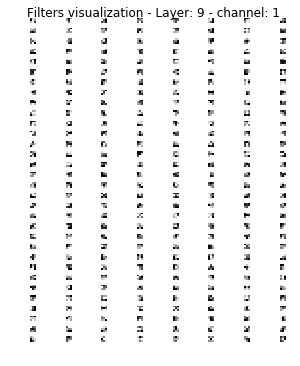

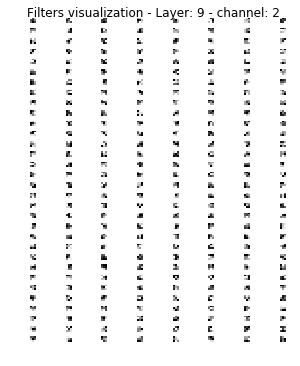

In [0]:
channels = 3
# visualize filters of the first 3 channel for each convolutional layer
for layer_index in [0, 3, 6, 9]:
    for i in range(channels):
        visualize_filters(model, layer_index, channel=i, figsize=(5, 5))

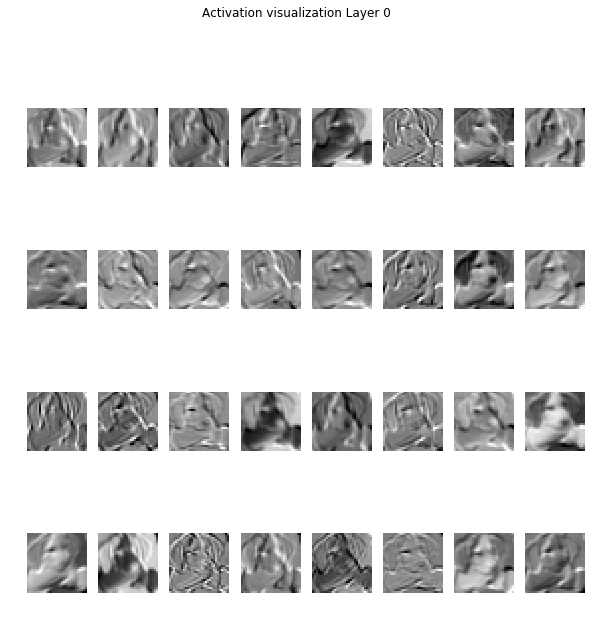

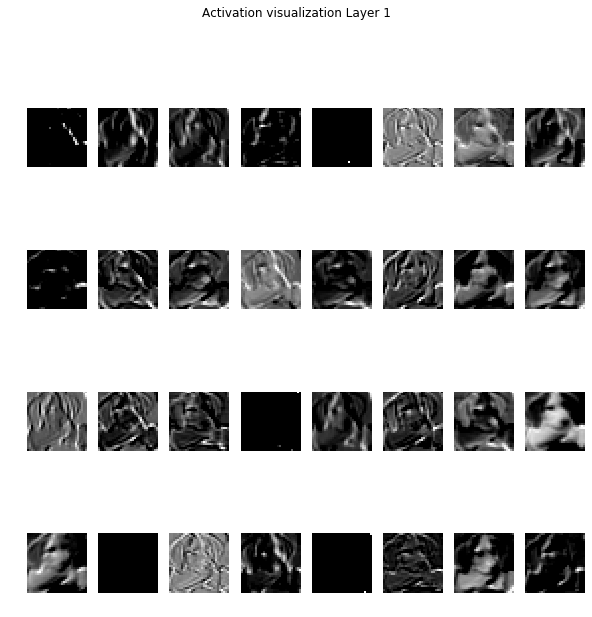

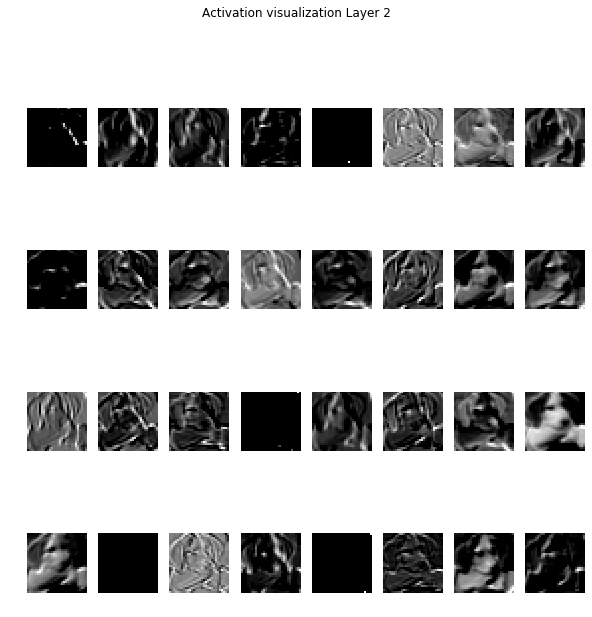

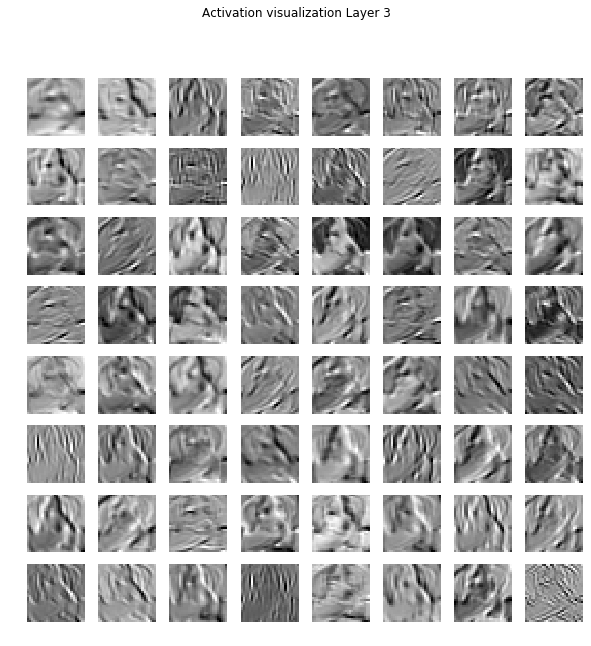

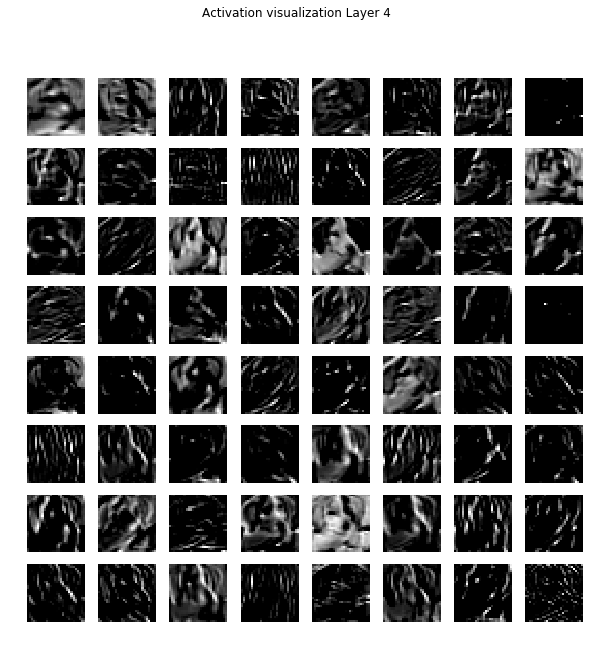

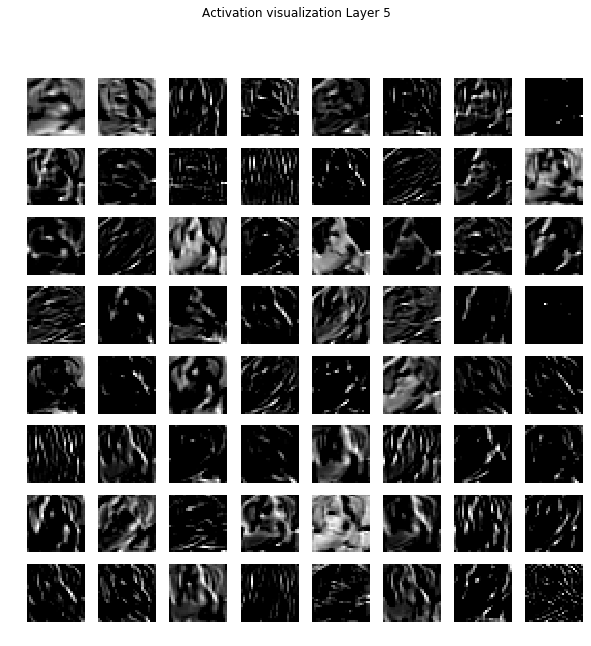

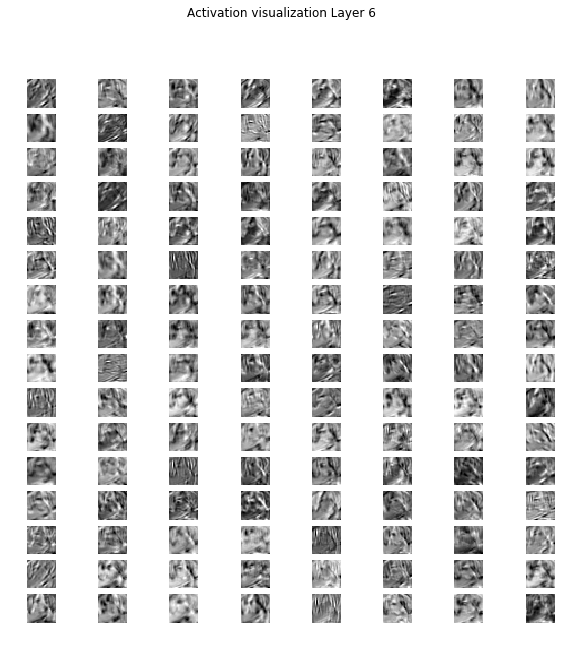

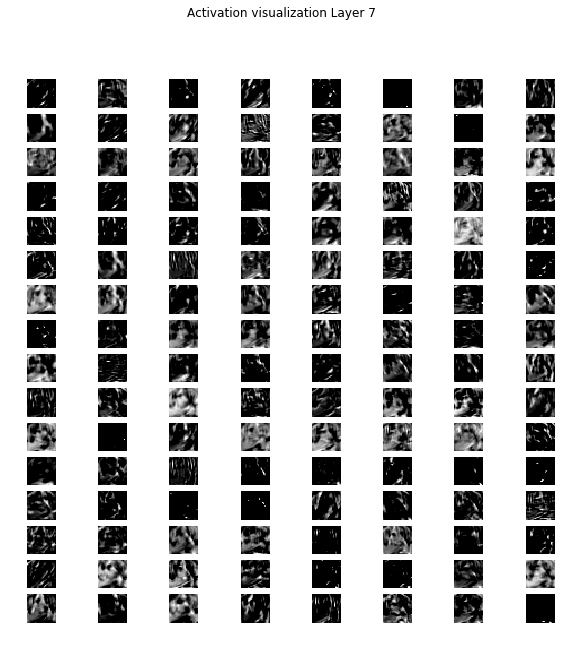

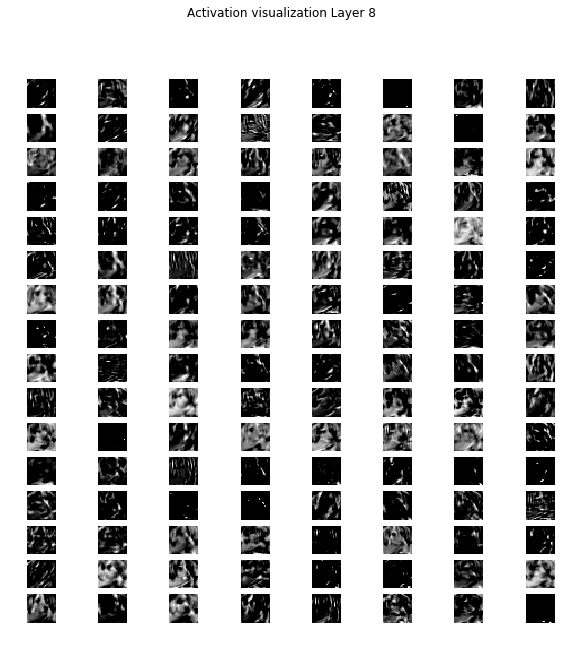

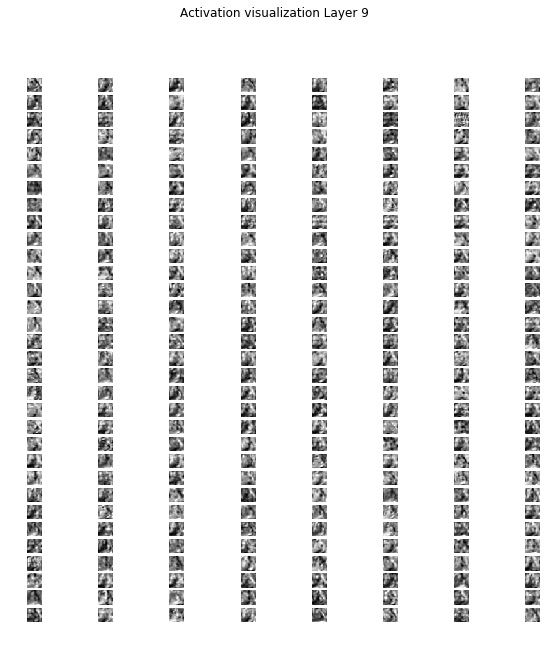

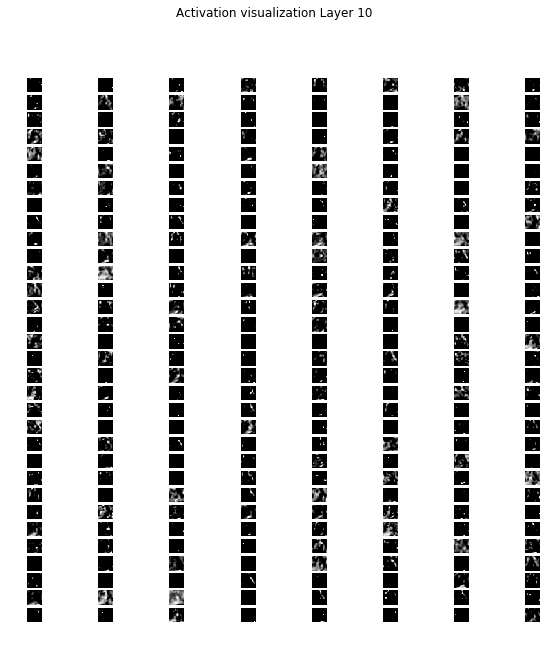

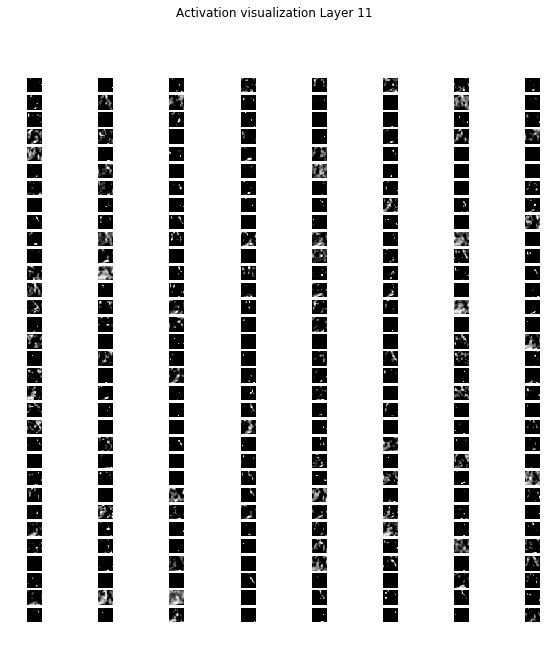

In [0]:
# visualize outputs after each convolutional layer
for i in range(12):
    visualize_activations(model, x_test, image_index=16, layer=i)